<a href="https://colab.research.google.com/github/mojoyinkimberly/Predicting_Wine_Quality/blob/main/Predicting_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from yellowbrick.regressor import ResidualsPlot



Reading the dataset into the python environment

In [2]:
red_wine_dataset = pd.read_csv("/content/winequality-red.csv", sep = ';')
red_wine_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


checking for missing values in the dataset

In [3]:
red_wine_dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values

checking for outliers using the describe function

In [4]:
red_wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
red_wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**checking for outliers using the inter quantile range**

In [6]:
Q1 = red_wine_dataset['fixed acidity'].quantile(.50)
Q3 = red_wine_dataset['fixed acidity'].quantile(.75)
print(Q1)
print(Q3)

IQR = Q3 - Q1

Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 - 1.5*IQR

print(Lower_Whisker, Upper_Whisker)

7.9
9.2
5.950000000000002 7.250000000000001


In [7]:
red_wine_dataset['fixed acidity'] = np.where(red_wine_dataset['fixed acidity'] > 9.200000, 7.900000, red_wine_dataset['fixed acidity'])
red_wine_dataset['volatile acidity'] = np.where(red_wine_dataset['volatile acidity'] > 0.640000, 0.520000, red_wine_dataset['volatile acidity'])
red_wine_dataset['citric acid'] = np.where(red_wine_dataset['citric acid'] > 0.420000, 0.260000, red_wine_dataset['citric acid'])
red_wine_dataset['residual sugar'] = np.where(red_wine_dataset['residual sugar'] > 2.600000, 2.200000, red_wine_dataset['residual sugar'])
red_wine_dataset['chlorides'] = np.where(red_wine_dataset['chlorides'] > 0.090000, 0.079000, red_wine_dataset['chlorides'])
red_wine_dataset['chlorides'] = np.where(red_wine_dataset['chlorides'] < 0.070000, 0.079000, red_wine_dataset['chlorides'])
red_wine_dataset['free sulfur dioxide'] = np.where(red_wine_dataset['free sulfur dioxide'] > 21.000000, 14.000000	, red_wine_dataset['free sulfur dioxide'])
red_wine_dataset['total sulfur dioxide'] = np.where(red_wine_dataset['total sulfur dioxide'] > 62.000000, 38.000000, red_wine_dataset['total sulfur dioxide'])
red_wine_dataset['density'] = np.where(red_wine_dataset['density'] > 0.997835, 0.996750, red_wine_dataset['density'])
red_wine_dataset['density'] = np.where(red_wine_dataset['density'] < 0.995600, 0.996750, red_wine_dataset['density'])
red_wine_dataset['pH'] = np.where(red_wine_dataset['pH'] > 3.400000, 3.310000, red_wine_dataset['pH'])
red_wine_dataset['pH'] = np.where(red_wine_dataset['pH'] < 3.210000, 3.310000, red_wine_dataset['pH'])
red_wine_dataset['sulphates'] = np.where(red_wine_dataset['sulphates'] > 0.730000, 0.620000, red_wine_dataset['sulphates'])
red_wine_dataset['alcohol'] = np.where(red_wine_dataset['alcohol'] > 11.100000, 10.200000, red_wine_dataset['alcohol'])
red_wine_dataset['quality'] = np.where(red_wine_dataset['quality'] > 6.000000, 6.000000, red_wine_dataset['quality'])
red_wine_dataset['quality'] = np.where(red_wine_dataset['quality'] < 5.000000, 6.000000, red_wine_dataset['quality'])

Checking for the relationship between the dependent and independent variables and also, the relationship among the independent variables to avoid multicollinearity.

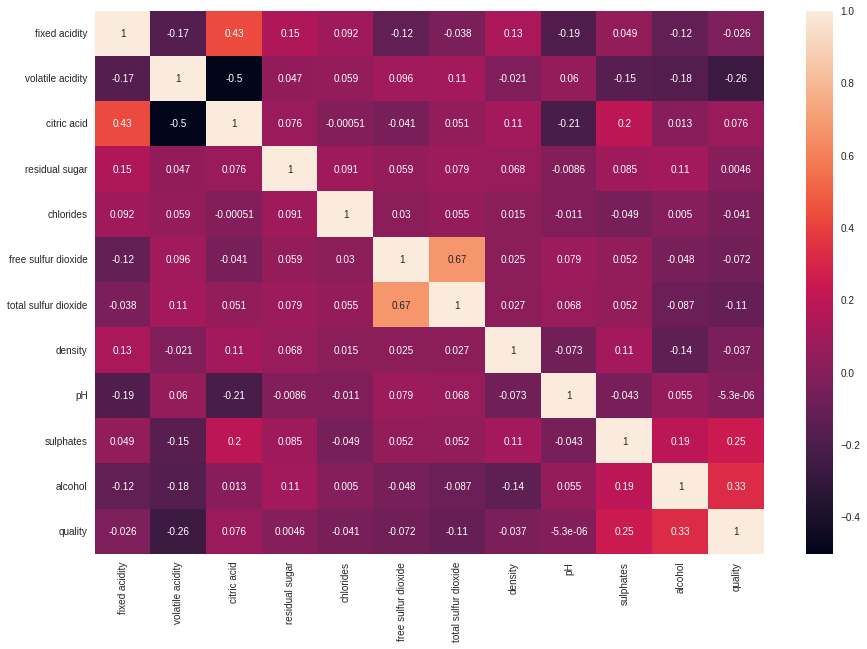

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(red_wine_dataset.corr(), annot=True)

splitting dataset into dependent and independent variables

In [9]:
y = red_wine_dataset['quality']
x = red_wine_dataset.drop(columns=['quality'])
X = red_wine_dataset.drop(columns = ['quality','total sulfur dioxide','volatile acidity','citric acid','residual sugar','chlorides','density','pH','sulphates','alcohol'])

checking for multicollinearity

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calcu_mult(df):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
calcu_mult(X)

,variables,VIF
0,fixed acidity,6.469064
1,free sulfur dioxide,6.469064


Splitting the dataset into train and test and then redoing the split for validation test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=45)

normalizing dataset


In [38]:
X_train.shape

(1279, 11)

In [39]:
new_norm = MinMaxScaler()
normalized_dataset = pd.DataFrame(new_norm.fit_transform(X_train))

In [40]:
X_train_, X_val_test, y_train_, y_val_test = train_test_split(normalized_dataset, y_train, test_size=0.25, random_state=1)

Depicting dimensionality reduction techniques using Random Forest.This shows the important variables that affect the dependent variable.All other variables should be dropped if found unimportant.

In [41]:
model = RandomForestRegressor(random_state=1, max_depth=4)
model.fit(normalized_dataset, X_train)

RandomForestRegressor(max_depth=4, random_state=1)

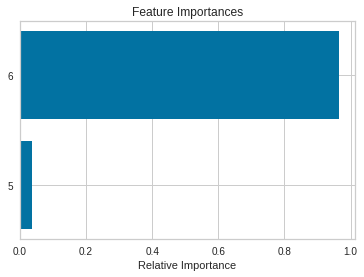

In [42]:
features = normalized_dataset.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-2:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices]) 
plt.xlabel('Relative Importance')
plt.show()

Fitting the Linear regression against the validation datasets to check how the model can learn from the data

In [44]:
model = LinearRegression()
power_output = model.fit(X_train_,y_train_)

Getting r-square score

In [46]:
coef_deter = power_output.score(X_train_,y_train_)
coef_deter

0.18274537319576045

In [47]:
1 - (1-power_output.score(X_train_,y_train_))*(len(y_train_)-1)/(len(y_train_)-X_train_.shape[1]-1)

0.17325244722443345

In [48]:
intercept = power_output.coef_
intercept

array([-0.00107913, -0.46944189, -0.12569753, -0.08152731,  0.02730221,
        0.06451068, -0.18100487, -0.04339357,  0.01135083,  0.54000079,
        0.64895773])

In [50]:
y_predict = power_output.predict(X_val_test)

In [51]:
print("MAE : ",mean_absolute_error(y_val_test, y_predict))
print("MSE : ",mean_squared_error(y_val_test, y_predict))
print("R2 score : ",r2_score(y_val_test, y_predict))

MAE :  0.40946773855341334
MSE :  0.20725052988992454
R2 score :  0.15783911663776695


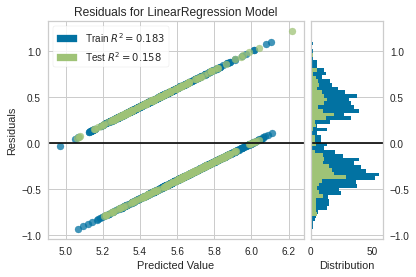

In [52]:
model = LinearRegression()
visualizer = ResidualsPlot(model, hist=True, qqplot=False)

visualizer.fit(X_train_, y_train_)  
visualizer.score(X_val_test, y_val_test)  
visualizer.show()

In [53]:
model_ = Ridge(alpha = 5)
power_output_ = model_.fit(X_train_,y_train_)

In [54]:
coef_deter_ = power_output_.score(X_train_,y_train_)
coef_deter_

0.18058378066015945

In [55]:
1 - (1-model_.score(X_train_,y_train_))*(len(y_train_)-1)/(len(y_train_)-X_train_.shape[1]-1)

0.1710657464334031

In [57]:
intercept_ = power_output_.coef_
intercept_


array([-0.02199463, -0.41448658, -0.08763222, -0.06106313,  0.0159188 ,
        0.04129506, -0.16387261, -0.04210962,  0.01350345,  0.46857202,
        0.58567661])

In [58]:
y_predict = power_output_.predict(X_val_test)

In [59]:
print("MAE : ",mean_absolute_error(y_val_test, y_predict))
print("MSE : ",mean_squared_error(y_val_test, y_predict))
print("R2 score : ",r2_score(y_val_test, y_predict))

MAE :  0.4160380459963262
MSE :  0.2061950443149473
R2 score :  0.16212807389481732


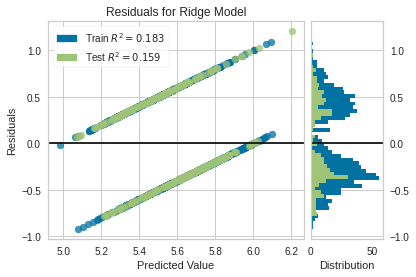

In [60]:
model = Ridge()
visualizer = ResidualsPlot(model, hist=True, qqplot=False)

visualizer.fit(X_train_, y_train_)  
visualizer.score(X_val_test, y_val_test)  
visualizer.show()